In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
df=pd.read_excel("C:/Users/Vijay/Desktop/data analysis/Employee.xlsx")

In [12]:
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [13]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [14]:
df.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [15]:
pd.set_option('display.max_columns', None)

In [16]:
df.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [17]:
a=[]
for i in df["ComputerProgramming"]:
    if i==-1:
        a.append(np.nan)
    else:
        a.append(i)

In [18]:
df['ComputerProgramming']=a

In [19]:
b=[]
for i in df['ElectronicsAndSemicon']:
    if i==-1:
        b.append(np.nan)
    else:
        b.append(i)

In [20]:
df['ElectronicsAndSemicon']=b

In [21]:
c=[]
for i in df['ComputerScience']:
    if i==-1:
        c.append(np.nan)
    else:
        c.append(i)

In [22]:
df['ComputerScience']=c

In [23]:
d=[]
for i in df['MechanicalEngg']:
    if i==-1:
        d.append(np.nan)
    else:
        d.append(i)

In [24]:
df['MechanicalEngg']=d

In [25]:
e=[]
for i in df['ElectricalEngg']:
    if i==-1:
        e.append(np.nan)
    else:
        e.append(i)

In [26]:
 df['ElectricalEngg']=e

In [27]:
f=[]
for i in df['TelecomEngg']:
    if i==-1:
        f.append(np.nan)
    else:
        f.append(i)

In [28]:
df['TelecomEngg']=f

In [29]:
g=[]
for i in df['CivilEngg']:
    if i==-1:
        g.append(np.nan)
    else:
        g.append(i)

In [30]:
df['CivilEngg']=g

In [31]:
df.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445.0,NaN,NaN,NaN,NaN,NaN,NaN,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,NaN,466.0,NaN,NaN,NaN,NaN,NaN,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395.0,NaN,NaN,NaN,NaN,NaN,NaN,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,NaN,233.0,NaN,NaN,NaN,NaN,NaN,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [32]:
df['Gender']=df['Gender'].map({'m':'male','f':'female'})

In [33]:
df['10board'].unique()

array(['board ofsecondary education,ap', 'cbse', 'state board',
       'mp board bhopal', 'icse',
       'karnataka secondary school of examination', 'up',
       'karnataka state education examination board', 'ssc',
       'kerala state technical education', 0, 'bseb',
       'state board of secondary education, andhra pradesh',
       'matriculation', 'gujarat state board', 'karnataka state board',
       'wbbse', 'maharashtra state board', 'icse board', 'up board',
       'board of secondary education(bse) orissa',
       'little jacky matric higher secondary school',
       'uttar pradesh board', 'bsc,orissa', 'mp board', 'upboard',
       'matriculation board', 'j & k bord', 'rbse',
       'central board of secondary education', 'pseb', 'jkbose',
       'haryana board of school education,(hbse)', 'metric', 'ms board',
       'kseeb', 'stateboard', 'maticulation',
       'karnataka secondory education board', 'mumbai board', 'sslc',
       'kseb', 'board secondary  education', 'mat

In [34]:
stateboard=[]
for i in df['10board']:
    if i!='cbse' and i!='state board' and i!='central board of secondary education' and i!='icse' and i!='icse board' and i!='0':
        stateboard.append(i)

In [35]:
stateboard

['board ofsecondary education,ap',
 'mp board bhopal',
 'karnataka secondary school of examination',
 'up',
 'karnataka state education examination board',
 'ssc',
 'kerala state technical education',
 0,
 'bseb',
 0,
 'up',
 'state board of secondary education, andhra pradesh',
 'matriculation',
 'gujarat state board',
 'karnataka state board',
 0,
 'wbbse',
 'maharashtra state board',
 'ssc',
 0,
 'up board',
 'board of secondary education(bse) orissa',
 'little jacky matric higher secondary school',
 0,
 'uttar pradesh board',
 0,
 0,
 0,
 'matriculation',
 'ssc',
 'bsc,orissa',
 0,
 'ssc',
 'mp board',
 0,
 0,
 'upboard',
 'up board',
 0,
 'ssc',
 0,
 0,
 0,
 'matriculation board',
 'uttar pradesh board',
 'karnataka state board',
 0,
 'ssc',
 'j & k bord',
 'up board',
 'up board',
 'wbbse',
 'ssc',
 'ssc',
 'ssc',
 'rbse',
 'pseb',
 0,
 'jkbose',
 0,
 'up board',
 'haryana board of school education,(hbse)',
 0,
 0,
 0,
 'up board',
 0,
 0,
 'ssc',
 'wbbse',
 'metric',
 'ms board'

In [36]:
for i in stateboard:
    df['10board']=df['10board'].replace(i,'state board')

In [37]:
cbse_board=['cbse','central board of secondary education']
for i in cbse_board:
    df['10board']=df['10board'].replace(i,'cbse')

In [38]:
icse_board=['icse','icse board']
for i in icse_board:
    df['10board']=df['10board'].replace(i,'icse')

In [39]:
bo=[]
for i in df['10board']:
    if i=='0':
        bo.append(np.nan)
    else:
        bo.append(i)

In [40]:
df['10board']=bo

In [41]:
df['10board'].value_counts()

state board    2308
cbse           1408
icse            282
Name: 10board, dtype: int64

In [42]:
df['10board'].isnull().sum()

0

In [43]:
df['12board'].unique()

array(['board of intermediate education,ap', 'cbse', 'state board',
       'mp board', 'isc', 'icse', 'karnataka pre university board', 'up',
       'p u board, karnataka', 'dept of pre-university education', 'bie',
       'kerala state hse board', 'up board', 0, 'bseb', 'chse', 'puc',
       ' upboard',
       'state  board of intermediate education, andhra pradesh',
       'karnataka state board',
       'west bengal state council of technical education', 'wbchse',
       'maharashtra state board', 'ssc', 'isc board',
       'sda matric higher secondary school', 'uttar pradesh board', 'ibe',
       'chsc', 'board of intermediate', 'isce', 'upboard', 'sbtet',
       'hisher seconadry examination(state board)', 'pre university',
       'borad of intermediate', 'j & k board',
       'intermediate board of andhra pardesh', 'rbse',
       'central board of secondary education', 'jkbose', 'hbse',
       'board of intermediate education', 'state', 'ms board', 'pue',
       'intermediate sta

In [44]:
sb=[]
for i in df['12board']:
    if i!='cbse' and i!='state board' and i!='icse' and i!='isc' and i!='isc board' and i!='isce' and i!='0':
        sb.append(i)

In [45]:
for i in sb:
    df['12board']=df['12board'].replace(i,'state board')

In [46]:
ib=['icse','isc','isc board','isce']
for i in ib:
    df['12board']=df['12board'].replace(i,'icse')
    

In [47]:
bod=[]
for i in df['12board']:
    if i=='0':
        bod.append(np.nan)
    else:
        bod.append(i)

In [48]:
df['12board']=bod

In [49]:
do=[]
for i in df['Domain']:
    if i==-1:
        do.append(np.nan)
    else:
        do.append(i)

In [50]:
df['Domain']=do

In [51]:
df.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,female,1990-02-19,84.3,state board,2007,95.8,state board,1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445.0,NaN,NaN,NaN,NaN,NaN,NaN,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000,2013-09-01,present,assistant manager,Indore,male,1989-10-04,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,NaN,466.0,NaN,NaN,NaN,NaN,NaN,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000,2014-06-01,present,systems engineer,Chennai,female,1992-08-03,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395.0,NaN,NaN,NaN,NaN,NaN,NaN,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,male,1989-12-05,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,male,1991-02-27,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,NaN,233.0,NaN,NaN,NaN,NaN,NaN,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [205]:
df.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Sex,10board_cbse,10board_icse,10board_state board,12board_cbse,12board_icse,12board_state board,Degree_B.Tech/B.E.,Degree_M.Sc. (Tech.),Degree_M.Tech./M.E.,Degree_MCA
0,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,female,1990-02-19,84.30,state board,2007,95.8,state board,1141,2,B.Tech/B.E.,computer science and engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445.0,NaN,NaN,NaN,NaN,NaN,NaN,0.9737,0.8128,0.5269,1.35490,-0.4455,0,0,0,1,0,0,1,1,0,0,0
1,579905,500000,2013-09-01,present,assistant manager,Indore,male,1989-10-04,85.40,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,NaN,466.0,NaN,NaN,NaN,NaN,NaN,-0.7335,0.3789,1.2396,-0.10760,0.8637,1,1,0,0,1,0,0,1,0,0,0
2,810601,325000,2014-06-01,present,systems engineer,Chennai,female,1992-08-03,85.00,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395.0,NaN,NaN,NaN,NaN,NaN,NaN,0.2718,1.7109,0.1637,-0.86820,0.6721,0,1,0,0,1,0,0,1,0,0,0
4,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,male,1991-02-27,78.00,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,NaN,233.0,NaN,NaN,NaN,NaN,NaN,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,1,1,0,0,1,0,0,1,0,0,0
5,1027655,300000,2014-06-01,present,system engineer,Hyderabad,male,1992-07-02,89.92,state board,2010,87.0,state board,5086,2,B.Tech/B.E.,electronics and communication engineering,76.32,5086,0,Karnataka,2014,560,555,620,NaN,645.0,NaN,407.0,NaN,NaN,NaN,NaN,-0.3027,-0.6201,-2.2954,-0.74150,-0.8608,1,0,0,1,0,0,1,1,0,0,0


In [55]:
df['Gender'].value_counts()

male      3041
female     957
Name: Gender, dtype: int64

In [56]:
df['Salary'].describe()

count    3.998000e+03
mean     3.076998e+05
std      2.127375e+05
min      3.500000e+04
25%      1.800000e+05
50%      3.000000e+05
75%      3.700000e+05
max      4.000000e+06
Name: Salary, dtype: float64

In [57]:
df.describe()

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3752.000000,3130.000000,1144.000000,902.000000,235.000000,161.000000,374.000000,42.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,5156.851426,0.300400,2012.105803,501.649075,501.598799,513.378189,0.609525,451.301278,335.644231,405.636364,406.876596,433.037267,350.173797,349.666667,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,3.632182e+05,2.127375e+05,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,4802.261482,0.458489,31.857271,104.940021,86.783297,122.302332,0.273159,97.158687,81.194840,89.960805,84.894993,98.515537,75.661864,79.784670,1.028666,0.941782,0.951471,1.007580,1.008075
min,1.124400e+04,3.500000e+04,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,2.000000,0.000000,0.000000,180.000000,195.000000,120.000000,0.002750,105.000000,133.000000,130.000000,180.000000,206.000000,153.000000,166.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,494.000000,0.000000,2012.000000,425.000000,445.000000,430.000000,0.376060,385.000000,292.000000,346.000000,362.000000,366.000000,287.500000,292.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,3879.000000,0.000000,2013.000000,500.000000,505.000000,515.000000,0.649390,455.000000,333.000000,407.000000,407.000000,433.000000,356.000000,348.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,8818.000000,1.000000,2014.000000,570.000000,565.000000,595.000000,0.842248,515.000000,388.000000,469.000000,446.000000,500.000000,393.000000,388.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,2017.000000,875.000000,795.000000,900.000000,0.999910,840.000000,612.000000,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


In [58]:
df['JobCity'].value_counts()

Bangalore           627
-1                  461
Noida               368
Hyderabad           335
Pune                290
                   ... 
Tirunelvelli          1
Ernakulam             1
Nanded                1
Dharmapuri            1
Asifabadbanglore      1
Name: JobCity, Length: 339, dtype: int64

In [59]:
df.dtypes

ID                                int64
Salary                            int64
DOJ                      datetime64[ns]
DOL                              object
Designation                      object
JobCity                          object
Gender                           object
DOB                      datetime64[ns]
10percentage                    float64
10board                          object
12graduation                      int64
12percentage                    float64
12board                          object
CollegeID                         int64
CollegeTier                       int64
Degree                           object
Specialization                   object
collegeGPA                      float64
CollegeCityID                     int64
CollegeCityTier                   int64
CollegeState                     object
GraduationYear                    int64
English                           int64
Logical                           int64
Quant                             int64


In [60]:
df["12graduation"]=df["12graduation"].astype(object)

In [61]:
df["CollegeCityID"]=df["CollegeCityID"].astype(object)

In [62]:
df["CollegeCityTier"]=df["CollegeCityTier"].astype(object)

In [63]:
df["GraduationYear"]=df["GraduationYear"].astype(object)

In [64]:
df["CollegeTier"]=df["CollegeTier"].astype(object)

In [65]:
df["CollegeID"]=df["CollegeID"].astype(object)

In [66]:
df.describe()

,ID,Salary,10percentage,12percentage,collegeGPA,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3752.000000,3130.000000,1144.000000,902.000000,235.000000,161.000000,374.000000,42.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,77.925443,74.466366,71.486171,501.649075,501.598799,513.378189,0.609525,451.301278,335.644231,405.636364,406.876596,433.037267,350.173797,349.666667,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,3.632182e+05,2.127375e+05,9.850162,10.999933,8.167338,104.940021,86.783297,122.302332,0.273159,97.158687,81.194840,89.960805,84.894993,98.515537,75.661864,79.784670,1.028666,0.941782,0.951471,1.007580,1.008075
min,1.124400e+04,3.500000e+04,43.000000,40.000000,6.450000,180.000000,195.000000,120.000000,0.002750,105.000000,133.000000,130.000000,180.000000,206.000000,153.000000,166.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,71.680000,66.000000,66.407500,425.000000,445.000000,430.000000,0.376060,385.000000,292.000000,346.000000,362.000000,366.000000,287.500000,292.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,79.150000,74.400000,71.720000,500.000000,505.000000,515.000000,0.649390,455.000000,333.000000,407.000000,407.000000,433.000000,356.000000,348.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,85.670000,82.600000,76.327500,570.000000,565.000000,595.000000,0.842248,515.000000,388.000000,469.000000,446.000000,500.000000,393.000000,388.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,97.760000,98.700000,99.930000,875.000000,795.000000,900.000000,0.999910,840.000000,612.000000,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


In [67]:
df.describe(include='O')

,DOL,Designation,JobCity,Gender,10board,12graduation,12board,CollegeID,CollegeTier,Degree,Specialization,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear
count,3998,3998,3998,3998,3998,3998,3998,3998,3998,3998,3998,3998,3998,3998,3998
unique,67,419,339,2,3,16,3,1350,2,4,46,1350,2,26,11
top,present,software engineer,Bangalore,male,state board,2009,state board,272,2,B.Tech/B.E.,electronics and communication engineering,272,0,Uttar Pradesh,2013
freq,1875,539,627,3041,2308,1052,2422,94,3701,3700,880,94,2797,915,1181


In [68]:
CSE=["computer science","computer science and technology","computer engineering","computer science & engineering"]
for i in CSE:
    df['Specialization']=df['Specialization'].replace(i,"computer science and engineering")

In [69]:
ECE=["electronics and communication engineering","electronics engineering","electronics"]
for i in ECE:
    df['Specialization']=df['Specialization'].replace(i,"electronics and communication engineering")

In [70]:
ITE=["instrumentation and control engineering","instrumentation engineering"]
for i in ITE:
    df['Specialization']=df['Specialization'].replace(i,"instrumentation engineering")
    

In [71]:
ETE=["electronics & telecommunications","telecommunication engineering"]
for i in ETE:
    df['Specialization']=df['Specialization'].replace(i,"electronics and telecommunication engineering")
    

In [72]:
EIE=["applied electronics and instrumentation","electronics and instrumentation engineering","electronics & instrumentation eng"]
for i in EIE:
    df['Specialization']=df['Specialization'].replace(i,"electronics and instrumentation engineering")

In [73]:
ISE=["information science engineering","information science"]
for i in ISE:
    df['Specialization']=df['Specialization'].replace(i,"information science engineering")
    

In [74]:
EEE=["electronics and electrical engineering","electrical engineering"]
for i in EEE:
    df['Specialization']=df['Specialization'].replace(i,"electrical and electronics engineering")
    

In [75]:
IE=['industrial & management engineering','industrial engineering','industrial & production engineering']
for i in IE:
    df['Specialization']=df['Specialization'].replace(i,"industrial engineering")
    
    

In [76]:
IT=["information & communication technology","information technology"]
for i in IT:
    df['Specialization']=df['Specialization'].replace(i,"information technology")

In [77]:
df['Specialization'].value_counts()

computer science and engineering                 1352
electronics and communication engineering         900
information technology                            662
electrical and electronics engineering            278
computer application                              244
mechanical engineering                            201
electronics and telecommunication engineering     127
electronics and instrumentation engineering        68
civil engineering                                  29
information science engineering                    28
instrumentation engineering                        24
biotechnology                                      15
industrial engineering                             13
other                                              13
chemical engineering                                9
mechanical and automation                           5
automobile/automotive engineering                   5
mechatronics                                        4
electronics and computer eng

In [78]:
jc=[]
for i in df['JobCity']:
    if i=='-1':
        jc.append(np.nan)
    else:
        jc.append(i)

In [79]:
df['JobCity']=jc

## Outliers

In [80]:
Q1 = df["Salary"].quantile(0.25)
Q2 = df["Salary"].quantile(0.50)
Q3 = df["Salary"].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

190000.0


In [81]:
minout=Q1-1.5*IQR
maxout=Q3+1.5*IQR

In [82]:
minout

-105000.0

In [83]:
maxout

655000.0

In [84]:
#Salary after outlier
df.drop(df[(df.Salary<minout)|(df.Salary>maxout)].index,inplace=True)

In [85]:
df[(df.Salary<minout)|(df.Salary>maxout)].index

Int64Index([], dtype='int64')

## UNI-VARIATE ANALYSIS

In [86]:
df.columns

Index(['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

<Axes: xlabel='Gender', ylabel='count'>

Text(0.5, 1.0, 'Gender')

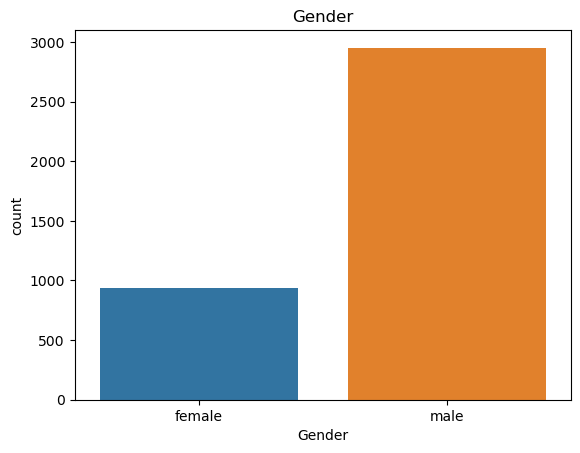

In [87]:
sns.countplot(x='Gender',data=df)
plt.title('Gender')

The above graph depicts the different types of gender present in the dataset.

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

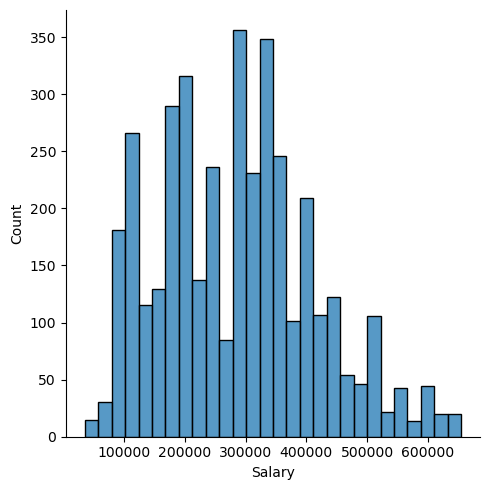

In [88]:
plt.figure(figsize=(10,10))
sns.displot(df['Salary'])

The above displot shows different types of salaries for the employees.

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

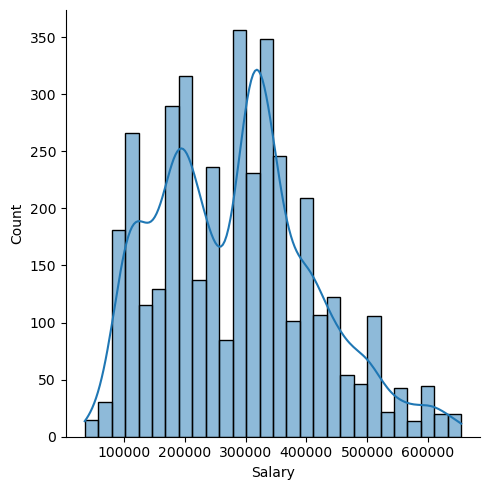

In [89]:
plt.figure(figsize=(10,10))
sns.displot(df['Salary'],kde=True)

The above histogram depicts the probability density function of salaries of the employees.

<Axes: xlabel='Salary', ylabel='Density'>

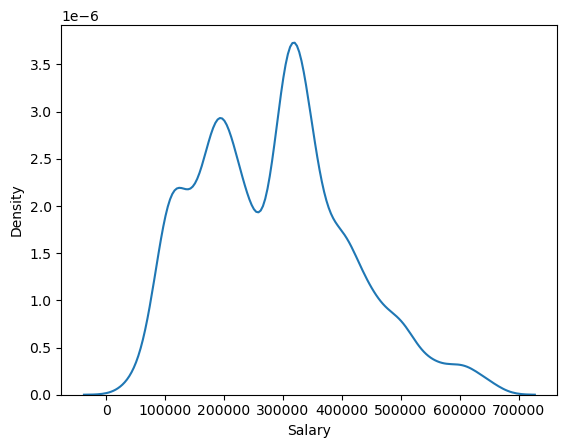

In [90]:
sns.kdeplot(x="Salary",data=df)

The above histogram depicts the probability density function of salaries of the employees.

<Axes: xlabel='Salary'>

Text(0.5, 1.0, 'Average of Salary')

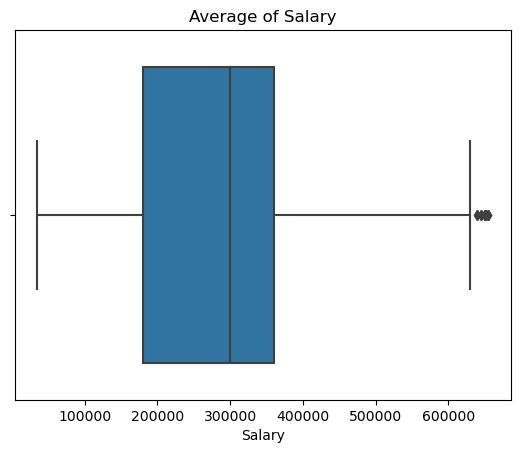

In [91]:
sns.boxplot(x="Salary",data=df)
plt.title("Average of Salary")

The above boxplot refers to the average salaries of the employees

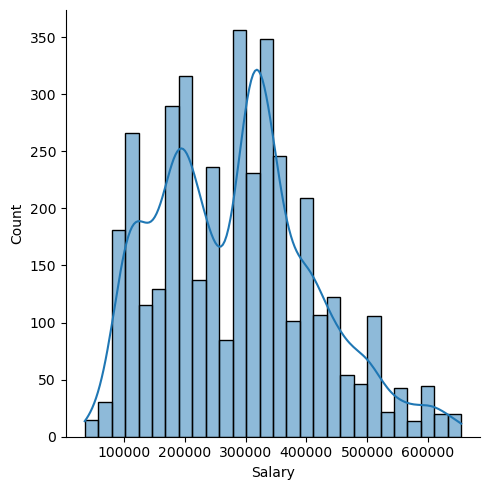

In [92]:
sns.displot(x='Salary',data=df,kde=True)

The above histogram refers to the salaries of the employees after the outliers are removed.

In [93]:
df.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,female,1990-02-19,84.30,state board,2007,95.8,state board,1141,2,B.Tech/B.E.,computer science and engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445.0,NaN,NaN,NaN,NaN,NaN,NaN,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000,2013-09-01,present,assistant manager,Indore,male,1989-10-04,85.40,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,NaN,466.0,NaN,NaN,NaN,NaN,NaN,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000,2014-06-01,present,systems engineer,Chennai,female,1992-08-03,85.00,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395.0,NaN,NaN,NaN,NaN,NaN,NaN,0.2718,1.7109,0.1637,-0.86820,0.6721
4,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,male,1991-02-27,78.00,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,NaN,233.0,NaN,NaN,NaN,NaN,NaN,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
5,1027655,300000,2014-06-01,present,system engineer,Hyderabad,male,1992-07-02,89.92,state board,2010,87.0,state board,5086,2,B.Tech/B.E.,electronics and communication engineering,76.32,5086,0,Karnataka,2014,560,555,620,NaN,645.0,NaN,407.0,NaN,NaN,NaN,NaN,-0.3027,-0.6201,-2.2954,-0.74150,-0.8608


<Figure size 1000x500 with 0 Axes>

<Axes: xlabel='CollegeState', ylabel='count'>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'Andhra Pradesh'),
  Text(1, 0, 'Madhya Pradesh'),
  Text(2, 0, 'Uttar Pradesh'),
  Text(3, 0, 'Karnataka'),
  Text(4, 0, 'Tamil Nadu'),
  Text(5, 0, 'Delhi'),
  Text(6, 0, 'West Bengal'),
  Text(7, 0, 'Maharashtra'),
  Text(8, 0, 'Haryana'),
  Text(9, 0, 'Telangana'),
  Text(10, 0, 'Orissa'),
  Text(11, 0, 'Punjab'),
  Text(12, 0, 'Kerala'),
  Text(13, 0, 'Gujarat'),
  Text(14, 0, 'Rajasthan'),
  Text(15, 0, 'Chhattisgarh'),
  Text(16, 0, 'Uttarakhand'),
  Text(17, 0, 'Jammu and Kashmir'),
  Text(18, 0, 'Jharkhand'),
  Text(19, 0, 'Himachal Pradesh'),
  Text(20, 0, 'Bihar'),
  Text(21, 0, 'Assam'),
  Text(22, 0, 'Goa'),
  Text(23, 0, 'Sikkim'),
  Text(24, 0, 'Union Territory'),
  Text(25, 0, 'Meghalaya')])

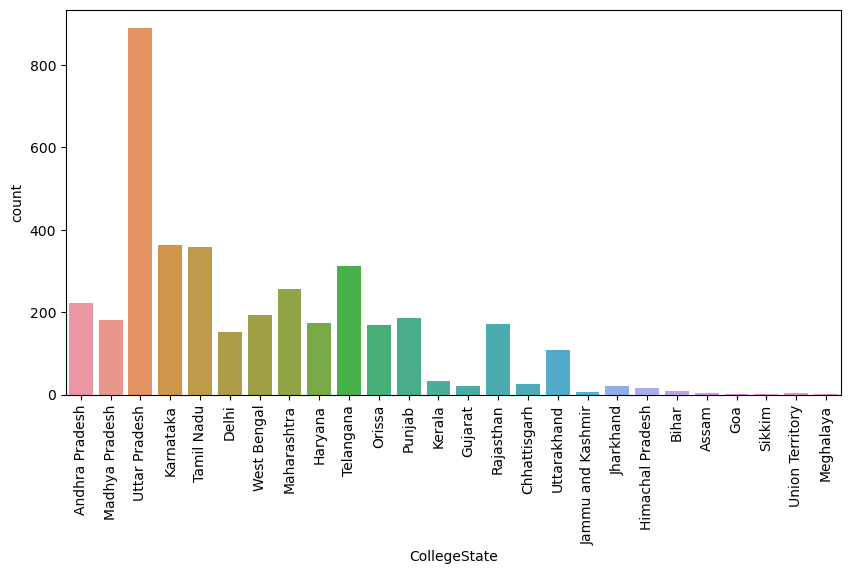

In [94]:
plt.figure(figsize=(10,5))
sns.countplot(x='CollegeState',data=df)
plt.xticks(rotation=90)

The above countplot refers to the different college states where the students have studied.

<Axes: xlabel='10board', ylabel='count'>

Text(0.5, 1.0, ' Different Board of colleges')

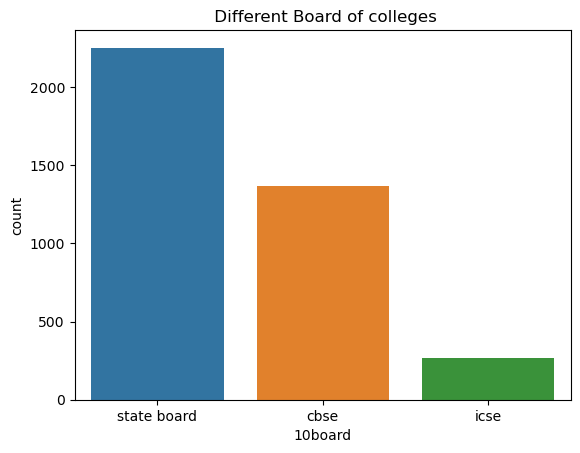

In [95]:
sns.countplot(x='10board',data=df)
plt.title(" Different Board of colleges")

The above countplot depicts the different types of boards present in the different colleges for the 10board.

<Axes: xlabel='12board', ylabel='count'>

Text(0.5, 1.0, ' Different Board of colleges')

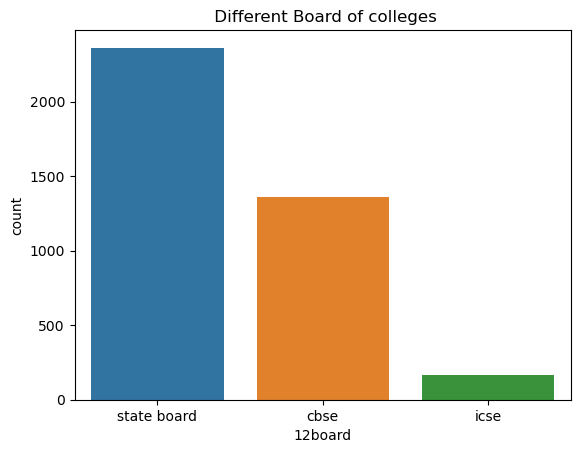

In [96]:
sns.countplot(x='12board',data=df)
plt.title(" Different Board of colleges")

The above countplot depicts the different types of boards present in the different colleges for the 10board.

<Axes: xlabel='10percentage'>

Text(0.5, 1.0, 'Average percentage of students')

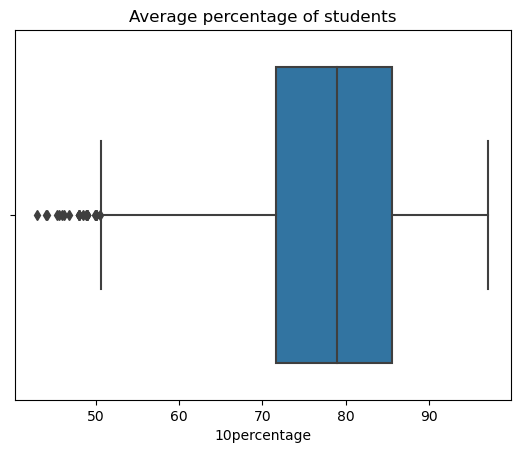

In [97]:
sns.boxplot(x='10percentage',data=df)
plt.title('Average percentage of students')

The above boxplot refers to the average percentages of the students in the 10board.

Text(0.5, 1.0, 'Frequency distribution of 10th percentage')

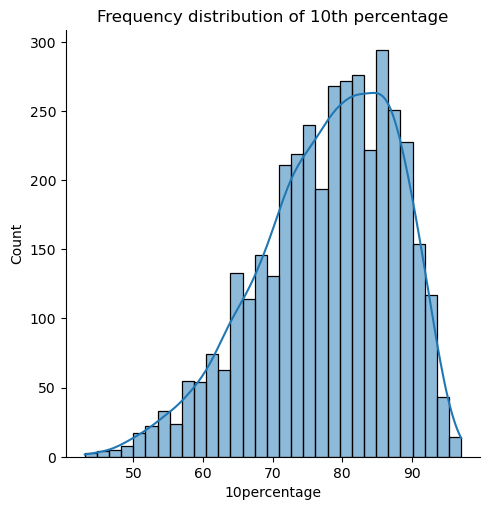

In [98]:
sns.displot(x='10percentage',data=df,kde=True)
plt.title('Frequency distribution of 10th percentage')

The above displot refers to the frequency distribution of 10percentage of students of 10board.

<Axes: xlabel='12percentage'>

Text(0.5, 1.0, 'Average percentage of students')

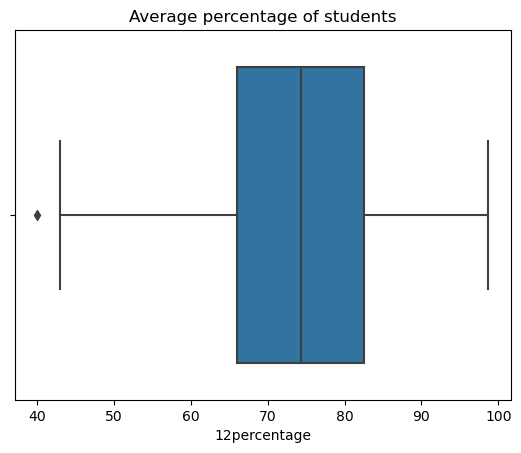

In [99]:
sns.boxplot(x='12percentage',data=df)
plt.title('Average percentage of students')

The above boxplot refers to the average percentages of the students in the 12board.

Text(0.5, 1.0, 'Frequency distribution of 12th percentage')

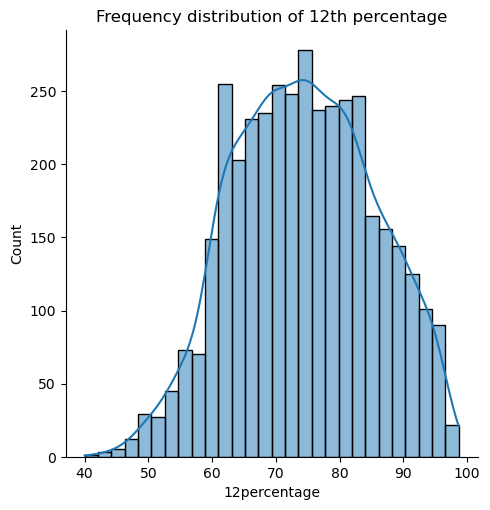

In [100]:
sns.displot(x='12percentage',data=df,kde=True)
plt.title('Frequency distribution of 12th percentage')

The above displot refers to the frequency distribution of 12percentage of students of 12board.

<Axes: xlabel='Salary'>

Text(0.5, 1.0, 'Average Salary of employees')

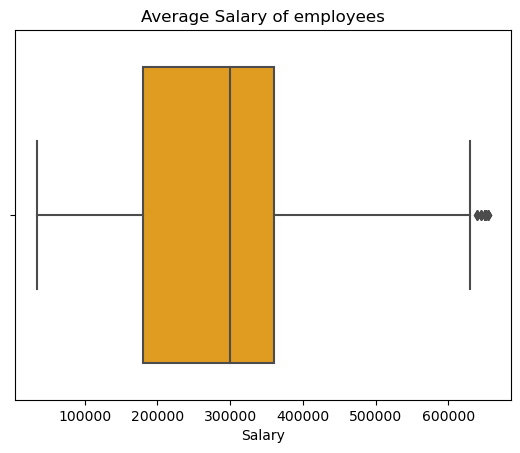

In [101]:
sns.boxplot(x='Salary',data=df,color='orange')
plt.title('Average Salary of employees')

The boxplot refers to average salaries of the employees.

<Figure size 800x500 with 0 Axes>

<Axes: xlabel='12graduation', ylabel='count'>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, '1995'),
  Text(1, 0, '1998'),
  Text(2, 0, '1999'),
  Text(3, 0, '2001'),
  Text(4, 0, '2002'),
  Text(5, 0, '2003'),
  Text(6, 0, '2004'),
  Text(7, 0, '2005'),
  Text(8, 0, '2006'),
  Text(9, 0, '2007'),
  Text(10, 0, '2008'),
  Text(11, 0, '2009'),
  Text(12, 0, '2010'),
  Text(13, 0, '2011'),
  Text(14, 0, '2012'),
  Text(15, 0, '2013')])

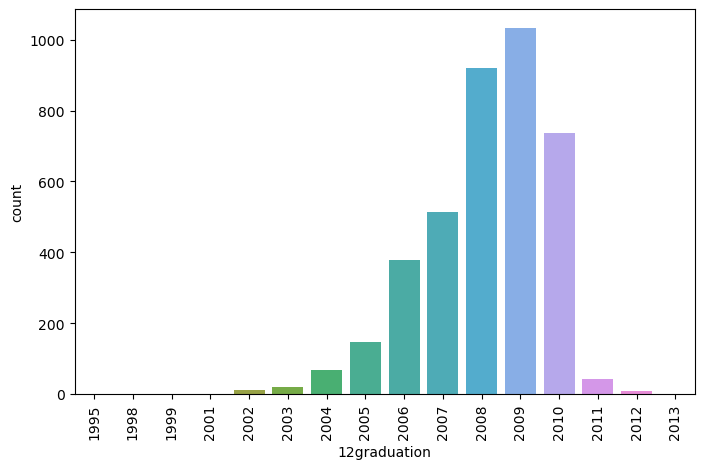

In [102]:
plt.figure(figsize=(8,5))
sns.countplot(x="12graduation",data=df)
plt.xticks(rotation=90)

The countplot refers to the graudation year where the students of 12board got graduated.

<Axes: xlabel='12graduation'>

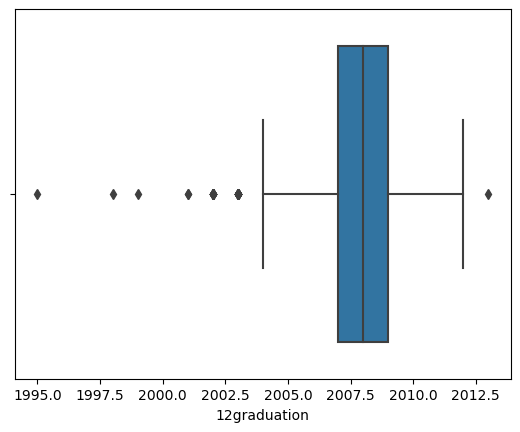

In [103]:
sns.boxplot(x="12graduation",data=df)

The boxplot refers to the the average students got graduated from the respective year of students 12board.

<Axes: xlabel='Degree', ylabel='count'>

Text(0.5, 1.0, 'Types of Degree graduate')

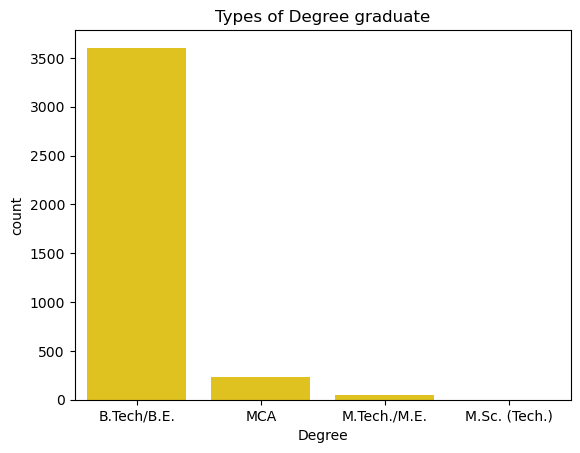

In [104]:
sns.countplot(x='Degree',data=df,color='gold')
plt.title('Types of Degree graduate')

The countplot refers to the different types of degree's studied by the students from the respective colleges.

<Axes: xlabel='10percentage', ylabel='Density'>

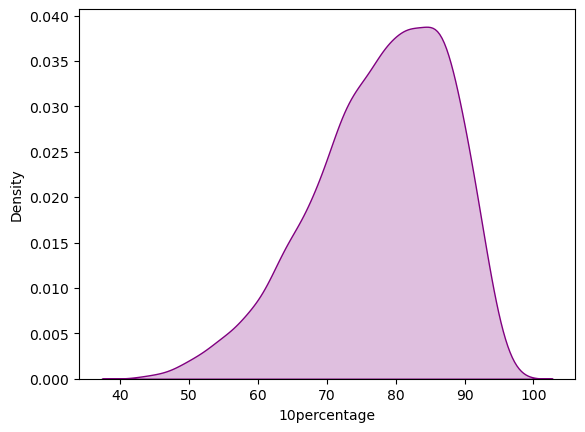

In [105]:
sns.kdeplot(df["10percentage"],shade=True,color="purple")

The kdeplot refers to density/average percentage of students of 10board.

<Axes: xlabel='12percentage', ylabel='Density'>

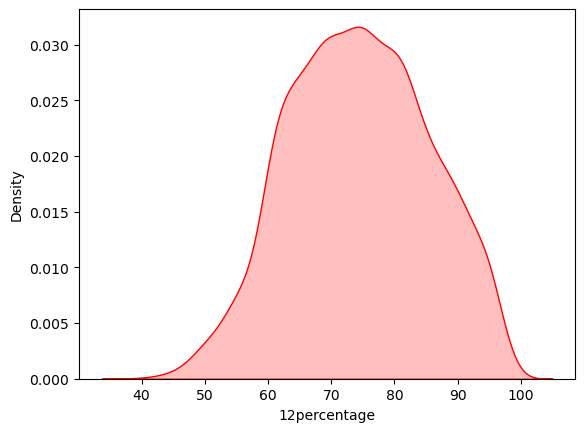

In [106]:
sns.kdeplot(df['12percentage'],shade=True,color='red')

The kdeplot refers to density/average percentage of students of 12board.

<Axes: xlabel='CollegeTier', ylabel='count'>

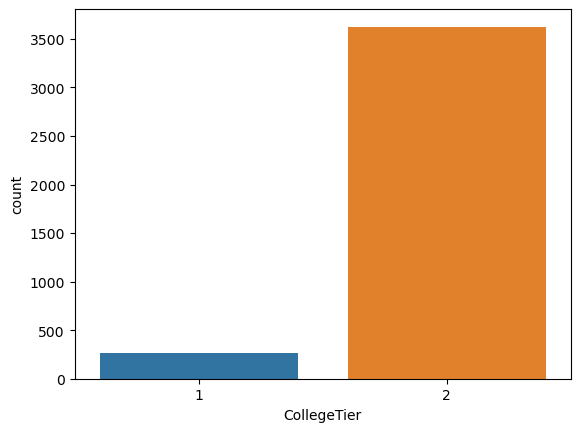

In [107]:
sns.countplot(x='CollegeTier',data=df)

The above countplot refers to collegetier of the different colleges.

<Axes: xlabel='CollegeCityTier', ylabel='count'>

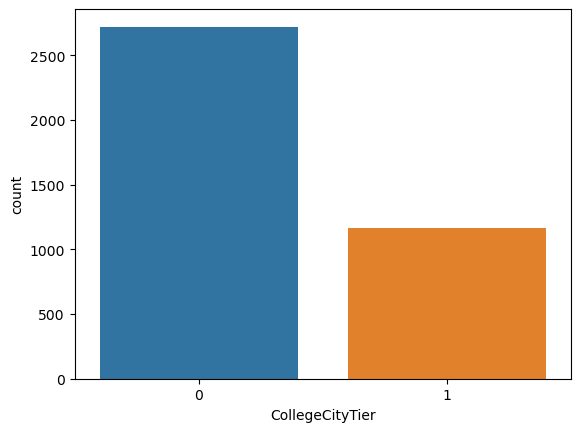

In [108]:
sns.countplot(x='CollegeCityTier',data=df)

The above countplot refers to collegecitytier of the different colleges.

<Axes: xlabel='collegeGPA'>

Text(0.5, 1.0, 'Average GPA of students')

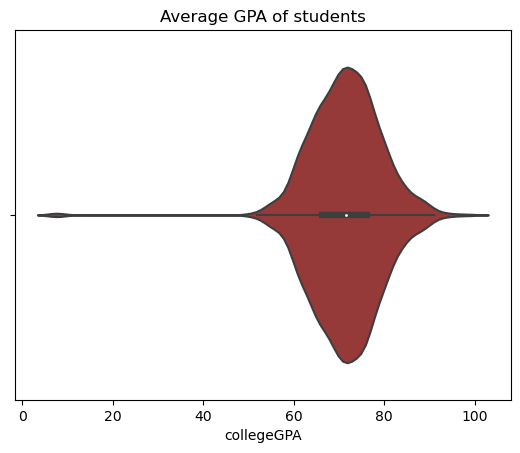

In [109]:
sns.violinplot(x='collegeGPA',data=df,color='brown')
plt.title('Average GPA of students')

The violinplot refers to average GPA of students with respective to colleges.

Text(0.5, 1.0, 'Frequency distribution of collegeGPA')

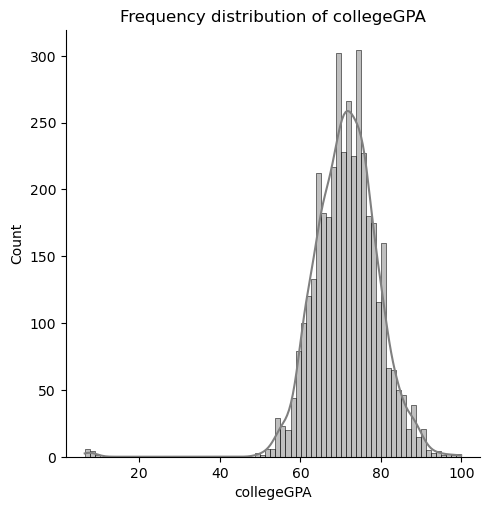

In [110]:
sns.displot(x='collegeGPA',data=df,color='grey',kde=True)
plt.title('Frequency distribution of collegeGPA')

The above displot refers to the frequency distribution of college GPA with respective to the colleges.

<Figure size 1500x600 with 0 Axes>

<Axes: xlabel='Specialization', ylabel='count'>

Text(0.5, 1.0, 'Types of Streams')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, 'computer science and engineering'),
  Text(1, 0, 'electronics and communication engineering'),
  Text(2, 0, 'information technology'),
  Text(3, 0, 'mechanical engineering'),
  Text(4, 0, 'electrical and electronics engineering'),
  Text(5, 0, 'electronics and telecommunication engineering'),
  Text(6, 0, 'instrumentation engineering'),
  Text(7, 0, 'computer application'),
  Text(8, 0, 'electronics and computer engineering'),
  Text(9, 0, 'electronics and instrumentation engineering'),
  Text(10, 0, 'information science engineering'),
  Text(11, 0, 'civil engineering'),
  Text(12, 0, 'mechanical and automation'),
  Text(13, 0, 'industrial engineering'),
  Text(14, 0, 'control and instrumentation engineering'),
  Text(15, 0, 'metallurgical engineering'),
  Text(16, 0, 'ceramic engineering'),
  Text(17, 0, 'chemical engineering'),
  

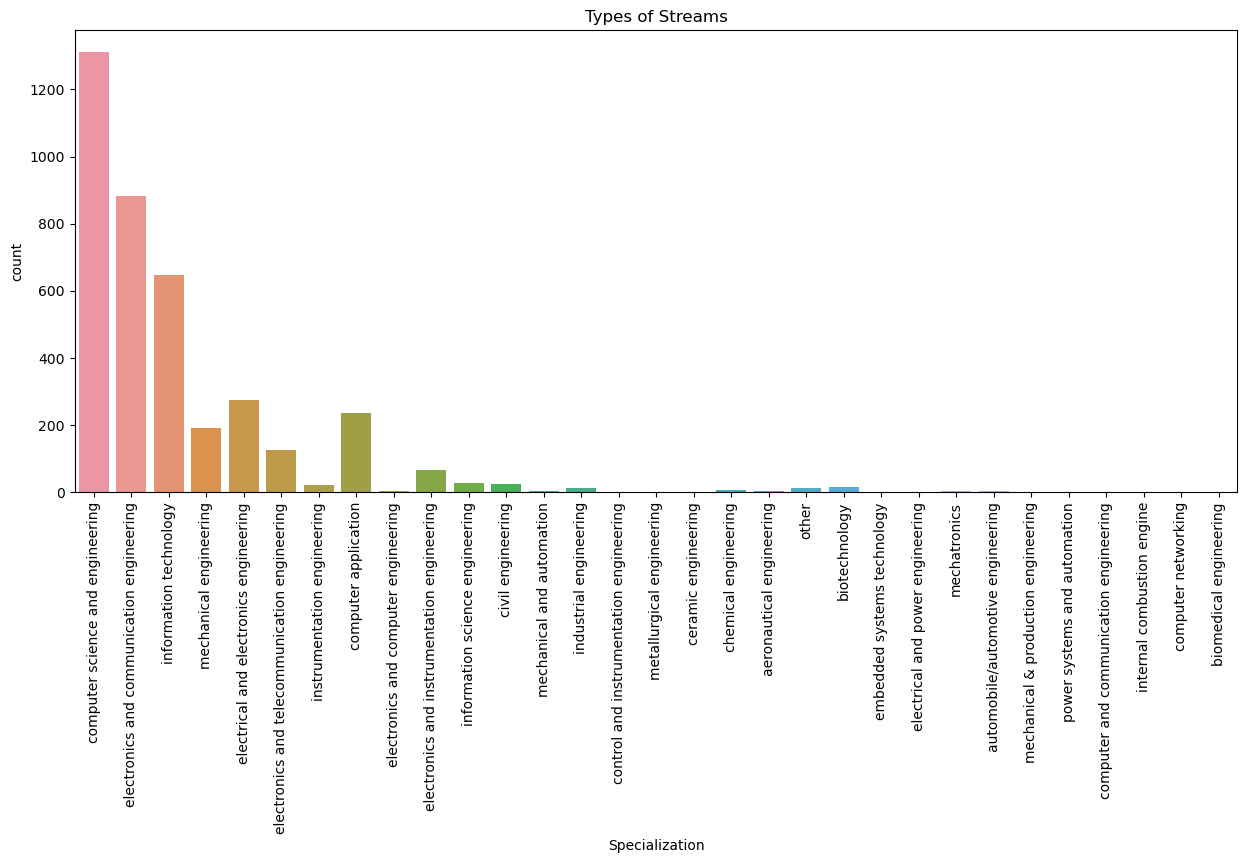

In [111]:
plt.figure(figsize=(15,6))
sns.countplot(x="Specialization",data=df)
plt.title("Types of Streams")
plt.xticks(rotation=90)

The above countplot refers to different specialization's present in the different colleges.

Text(0.5, 1.0, 'Frequency distribution of Quant marks')

Text(0.5, 9.444444444444438, 'Number of marks')

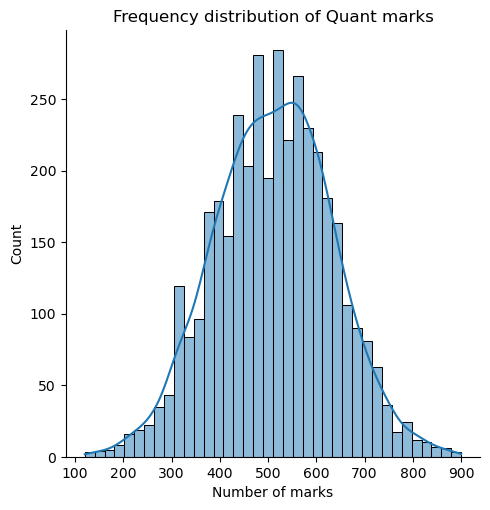

In [112]:
sns.displot(df['Quant'],kde=True)
plt.title('Frequency distribution of Quant marks')
plt.xlabel('Number of marks')
plt.show()

The above displot refers to the frequency distribution of the quant marks.

<Axes: >

Text(0.5, 1.0, 'Frequency distribution of Quant marks')

Text(0.5, 0, 'Number of marks')

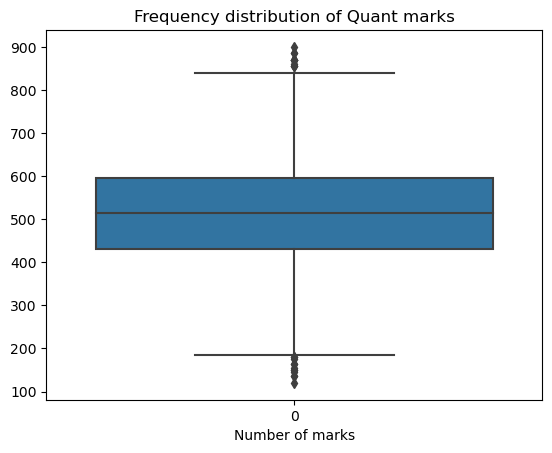

In [113]:
sns.boxplot(df['Quant'])
plt.title('Frequency distribution of Quant marks')
plt.xlabel('Number of marks')
plt.show()

The boxplot refers to density of quant marks lying between the different ranges.

Text(0.5, 1.0, 'Frequency distribution of English marks')

Text(0.5, 9.444444444444438, 'Number of marks')

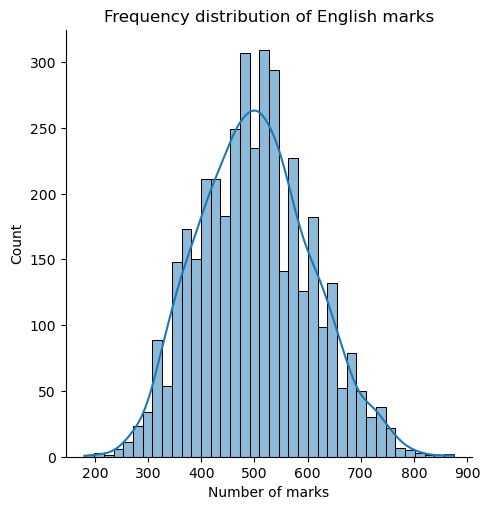

In [114]:
sns.displot(df['English'],kde=True)
plt.title('Frequency distribution of English marks')
plt.xlabel('Number of marks')
plt.show()

The above displot refers to the frequency distribution of the English marks.

<Axes: >

Text(0.5, 1.0, 'Frequency distribution of English marks')

Text(0.5, 0, 'Number of marks')

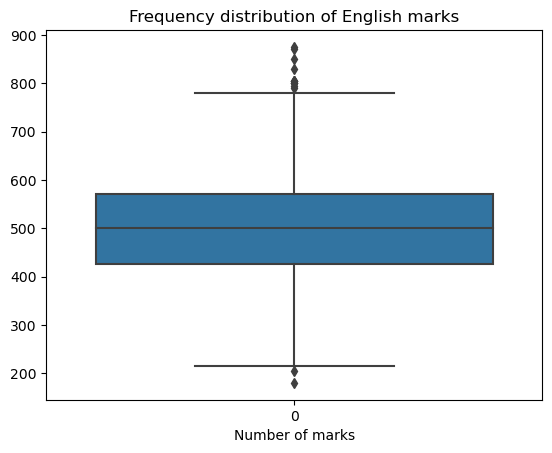

In [115]:
sns.boxplot(df['English'])
plt.title('Frequency distribution of English marks')
plt.xlabel('Number of marks')
plt.show()

The boxplot refers to density of english marks lying between the different ranges.

Text(0.5, 1.0, 'Frequency distribution of Logical marks')

Text(0.5, 9.444444444444438, 'Number of marks')

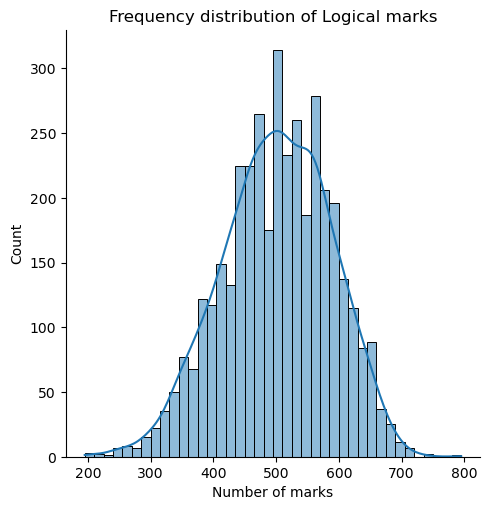

In [116]:
sns.displot(df['Logical'],kde=True)
plt.title('Frequency distribution of Logical marks')
plt.xlabel('Number of marks')
plt.show()

The above displot refers to the frequency distribution of the logical marks.

<Axes: >

Text(0.5, 1.0, 'Frequency distribution of Logical marks')

Text(0.5, 0, 'Number of marks')

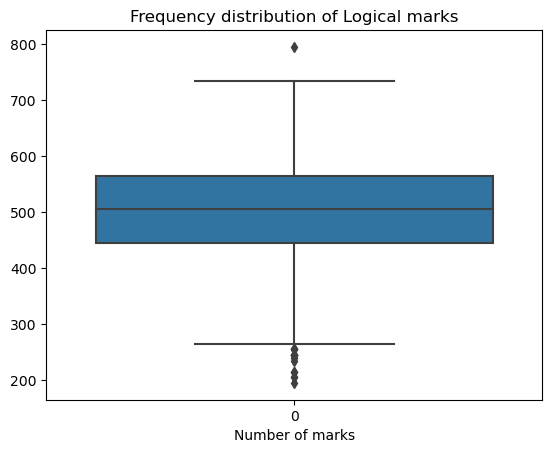

In [117]:
sns.boxplot(df['Logical'])
plt.title('Frequency distribution of Logical marks')
plt.xlabel('Number of marks')
plt.show()

The boxplot refers to density of logical marks lying between the different ranges.

<Axes: xlabel='GraduationYear', ylabel='count'>

Text(0.5, 1.0, 'Year of Graduation')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '0'),
  Text(1, 0, '2007'),
  Text(2, 0, '2009'),
  Text(3, 0, '2010'),
  Text(4, 0, '2011'),
  Text(5, 0, '2012'),
  Text(6, 0, '2013'),
  Text(7, 0, '2014'),
  Text(8, 0, '2015'),
  Text(9, 0, '2016'),
  Text(10, 0, '2017')])

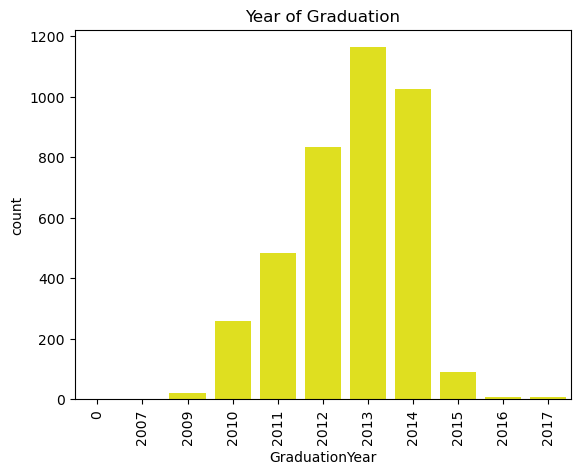

In [118]:
sns.countplot(x='GraduationYear',data=df,color='yellow')
plt.title('Year of Graduation')
plt.xticks(rotation=90)


The countplot refers to graduation year where the students got graduated from yhe respective year.

Text(0.5, 1.0, 'Frequency distribution of Domain')

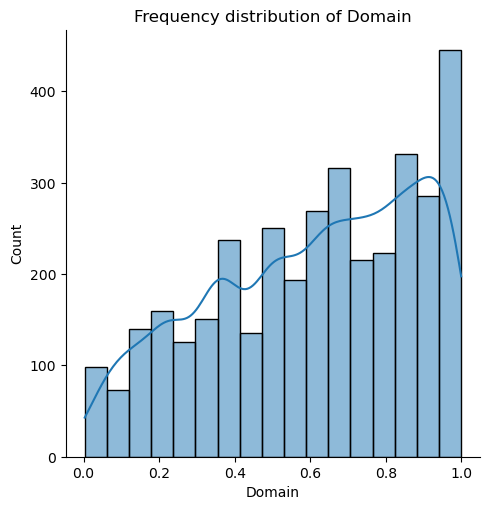

In [119]:
sns.displot(x='Domain',data=df,kde=True)
plt.title('Frequency distribution of Domain')

The above displot refers to the frequency distribution of the Domain.

<Axes: xlabel='Domain'>

Text(0.5, 1.0, 'Frequency distribution of Domain')

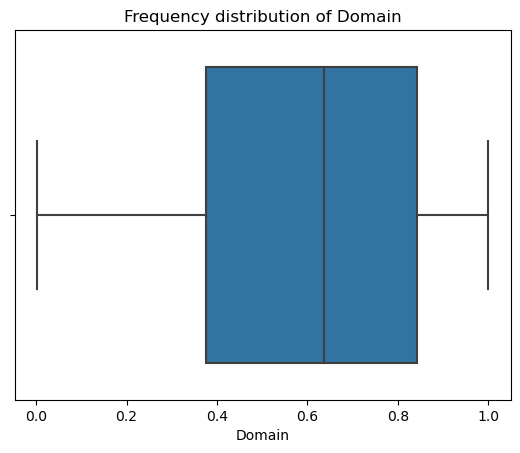

In [120]:
sns.boxplot(x='Domain',data=df)
plt.title('Frequency distribution of Domain')

The boxplot refers to density of Domain lying between the different ranges.

Text(0.5, 1.0, 'Frequency distribution of conscientiousness')

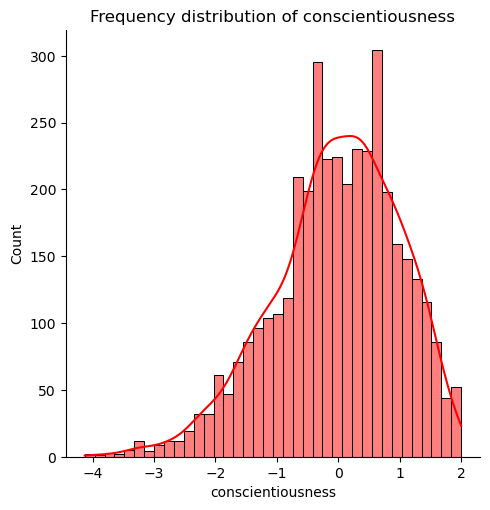

In [121]:
sns.displot(x='conscientiousness',data=df,kde=True,color='red')
plt.title('Frequency distribution of conscientiousness')

The above displot refers to the frequency distribution of the conscientiousness.

<Axes: xlabel='conscientiousness'>

Text(0.5, 1.0, 'Frequency distribution of conscientiousness')

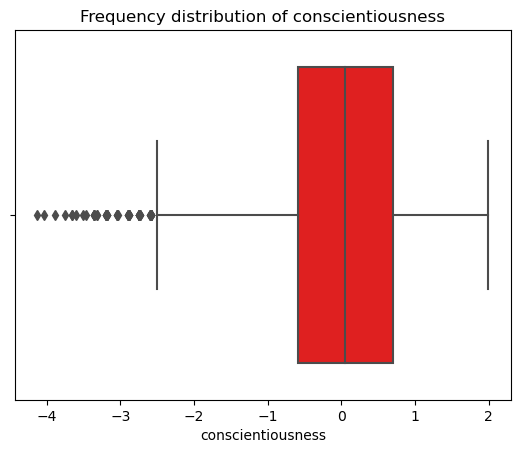

In [122]:
sns.boxplot(x='conscientiousness',data=df,color='red')
plt.title('Frequency distribution of conscientiousness')

The boxplot refers to density of conscientiousness lying between the different ranges.

Text(0.5, 1.0, 'Frequency distribution of agreeableness')

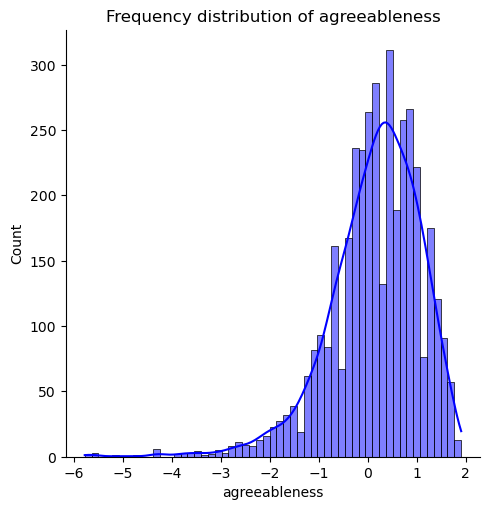

In [123]:
sns.displot(x='agreeableness',data=df,kde=True,color='blue')
plt.title('Frequency distribution of agreeableness')

The above displot refers to the frequency distribution of the agreebleness.

<Axes: xlabel='agreeableness'>

Text(0.5, 1.0, 'Frequency distribution of agreeableness')

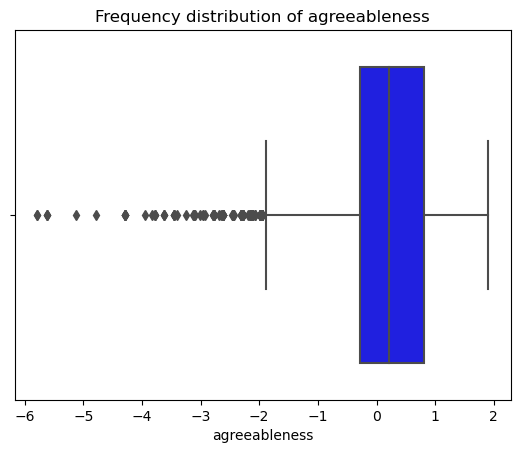

In [124]:
sns.boxplot(x='agreeableness',data=df,color='blue')
plt.title('Frequency distribution of agreeableness')

The boxplot refers to density of agreebleness lying between the different ranges.

Text(0.5, 1.0, 'Frequency distribution of extraversion')

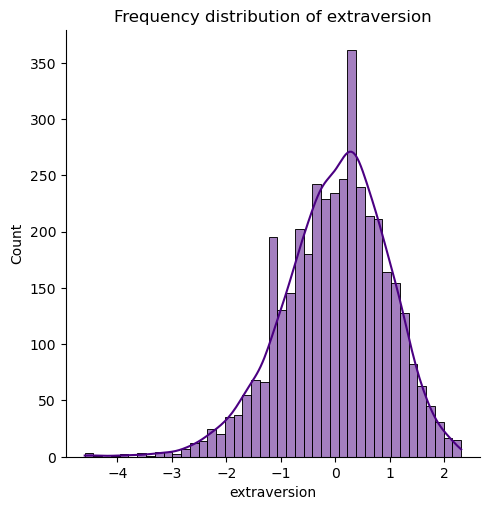

In [125]:
sns.displot(x='extraversion',data=df,kde=True,color='indigo')
plt.title('Frequency distribution of extraversion')

The above displot refers to the frequency distribution of the extraversion.

<Axes: xlabel='extraversion'>

Text(0.5, 1.0, 'Frequency distribution of extraversion')

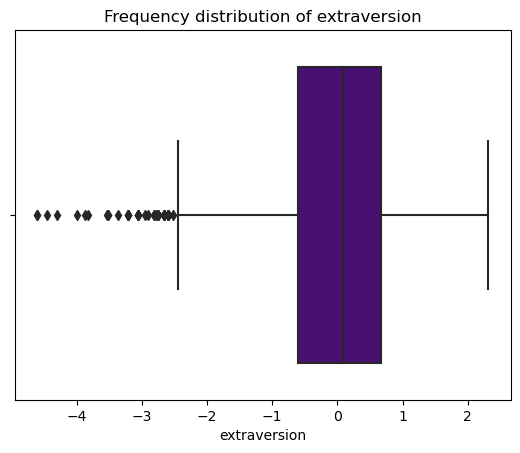

In [126]:
sns.boxplot(x='extraversion',data=df,color='indigo')
plt.title('Frequency distribution of extraversion')

The boxplot refers to density of extraversion lying between the different ranges.

Text(0.5, 1.0, 'Frequency distribution of nueroticism')

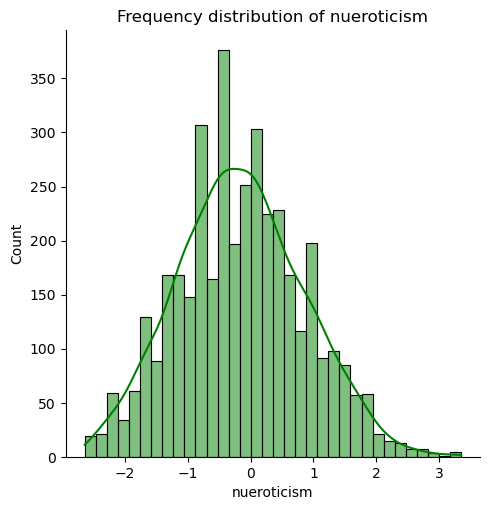

In [127]:
sns.displot(x='nueroticism',data=df,kde=True,color='green')
plt.title('Frequency distribution of nueroticism')

The above displot refers to the frequency distribution of the nueroticism.

<Axes: xlabel='nueroticism'>

Text(0.5, 1.0, 'Frequency distribution of nueroticism')

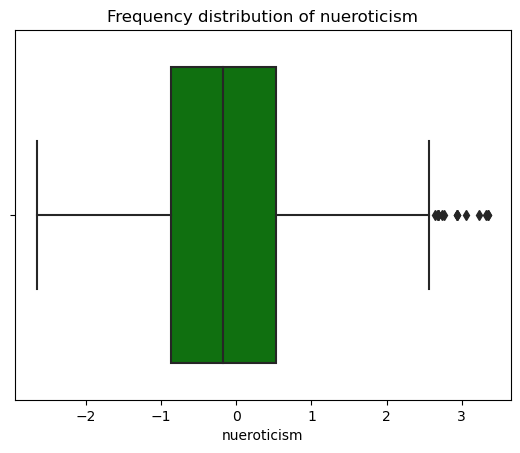

In [128]:
sns.boxplot(x='nueroticism',data=df,color='green')
plt.title('Frequency distribution of nueroticism')

The boxplot refers to density of nueroticism lying between the different ranges.

Text(0.5, 1.0, 'Frequency distribution of openess_to_experience')

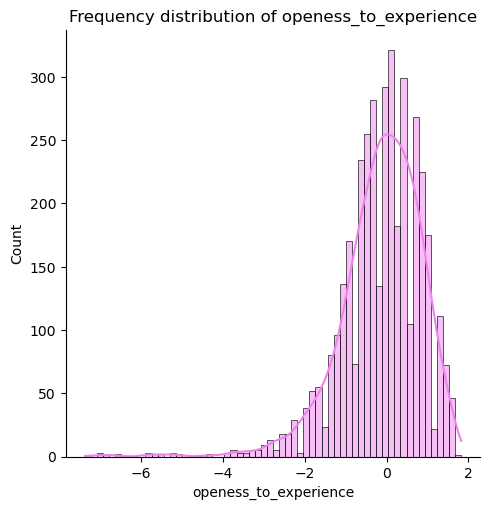

In [129]:
sns.displot(x='openess_to_experience',data=df,kde=True,color='violet')
plt.title('Frequency distribution of openess_to_experience')

The above displot refers to the frequency distribution of the openess_to_experience.

The boxplot refers to density of openess_to_experience lying between the different ranges.

Text(0.5, 1.0, 'Frequency distribution of ComputerProgramming')

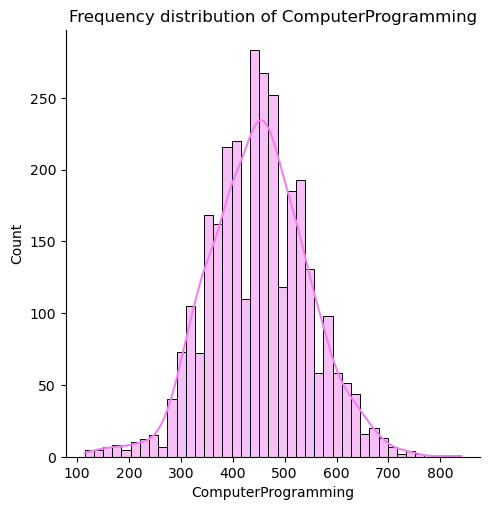

In [130]:
sns.displot(x='ComputerProgramming',data=df,kde=True,color='violet')
plt.title('Frequency distribution of ComputerProgramming')

The above displot refers to the frequency distribution of the computerprogramming.

<Axes: xlabel='ComputerProgramming'>

Text(0.5, 1.0, 'Frequency distribution of ComputerProgramming')

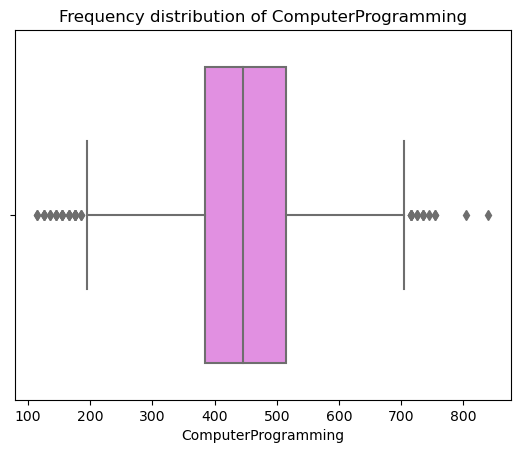

In [131]:
sns.boxplot(x='ComputerProgramming',data=df,color='violet')
plt.title('Frequency distribution of ComputerProgramming')

The boxplot refers to density of computerprogramming marks lying between the different ranges.

In [132]:
df.columns

Index(['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

Text(0.5, 1.0, 'Frequency distribution of ElectronicsAndSemicon')

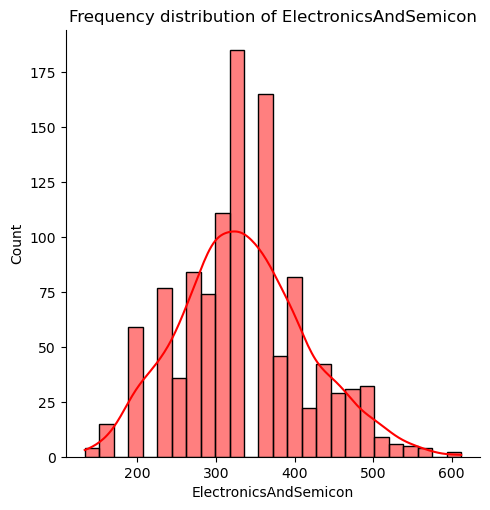

In [133]:
sns.displot(x='ElectronicsAndSemicon',data=df,kde=True,color='red')
plt.title('Frequency distribution of ElectronicsAndSemicon')

The above displot refers to the frequency distribution of the ElectronicsAndSemicon.

<Axes: xlabel='ElectronicsAndSemicon'>

Text(0.5, 1.0, 'Frequency distribution of ElectronicsAndSemicon')

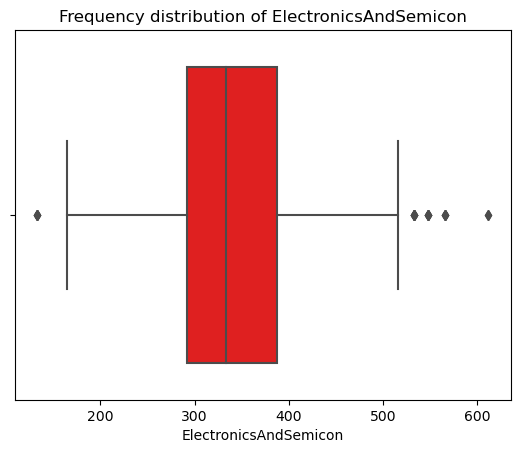

In [134]:
sns.boxplot(x='ElectronicsAndSemicon',data=df,color='red')
plt.title('Frequency distribution of ElectronicsAndSemicon')

The boxplot refers to density of ElectronicsandSemicon marks lying between the different ranges.

Text(0.5, 1.0, 'Frequency distribution of ComputerScience')

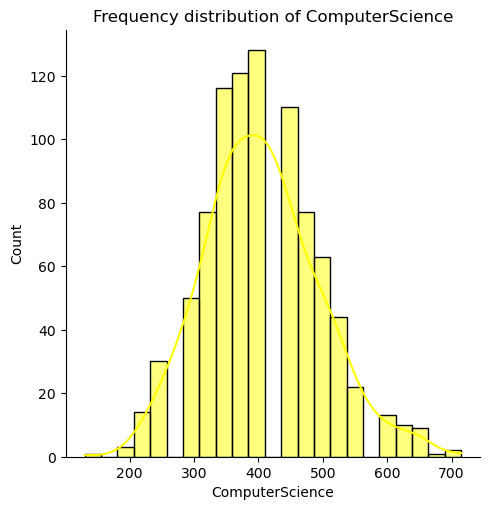

In [135]:
sns.displot(x='ComputerScience',data=df,kde=True,color='yellow')
plt.title('Frequency distribution of ComputerScience')

The above displot refers to the frequency distribution of the ComputerScience.

<Axes: xlabel='ComputerScience'>

Text(0.5, 1.0, 'Frequency distribution of ComputerScience')

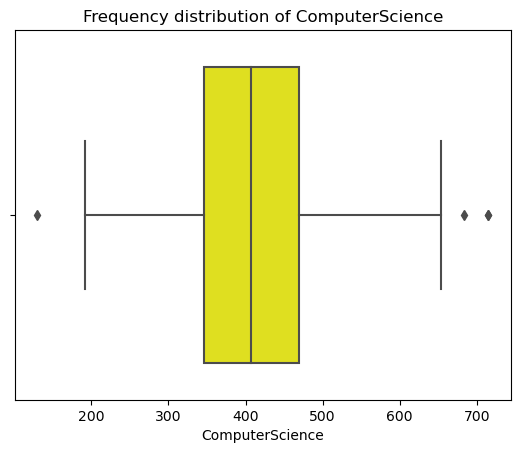

In [136]:
sns.boxplot(x='ComputerScience',data=df,color='yellow')
plt.title('Frequency distribution of ComputerScience')

The boxplot refers to density of CompuerScience marks lying between the different ranges.

Text(0.5, 1.0, 'Frequency distribution of MechanicalEngg')

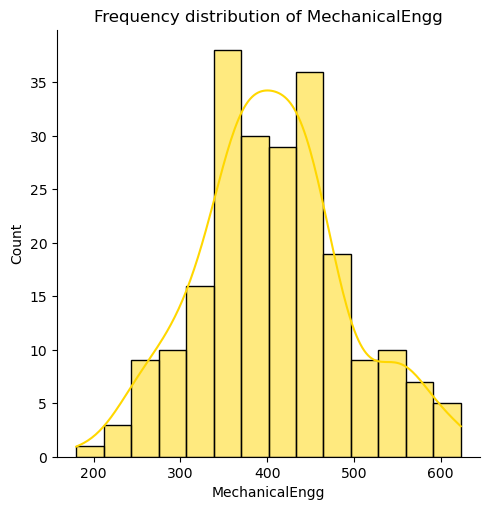

In [137]:
sns.displot(x='MechanicalEngg',data=df,kde=True,color='gold')
plt.title('Frequency distribution of MechanicalEngg')

The above displot refers to the frequency distribution of the MechanicalEngg.

<Axes: xlabel='MechanicalEngg'>

Text(0.5, 1.0, 'Frequency distribution of MechanicalEngg')

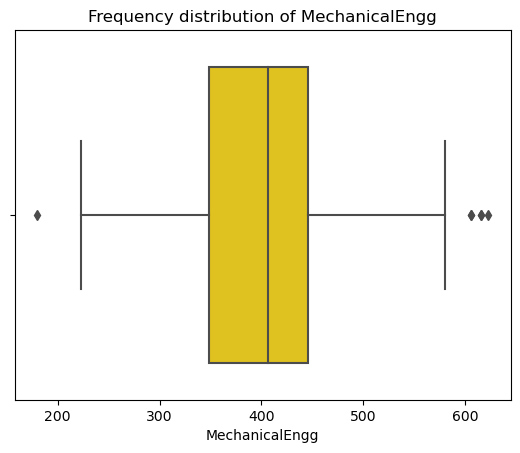

In [138]:
sns.boxplot(x='MechanicalEngg',data=df,color='gold')
plt.title('Frequency distribution of MechanicalEngg')

The boxplot refers to density of MechanicalEngg marks lying between the different ranges.

Text(0.5, 1.0, 'Frequency distribution of ElectricalEngg')

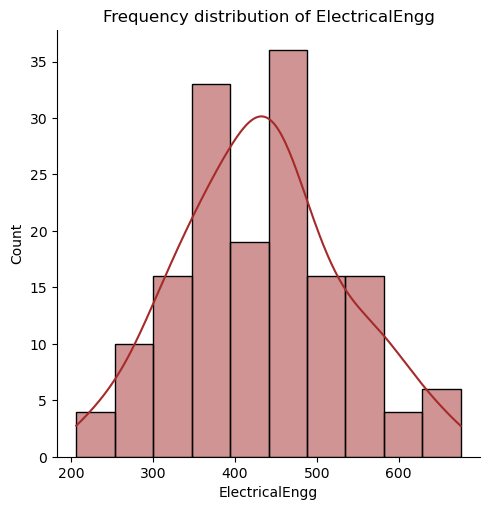

In [139]:
sns.displot(x='ElectricalEngg',data=df,kde=True,color='brown')
plt.title('Frequency distribution of ElectricalEngg')

The above displot refers to the frequency distribution of the ElectricalEngg.

<Axes: xlabel='ElectricalEngg'>

Text(0.5, 1.0, 'Frequency distribution of ElectricalEngg')

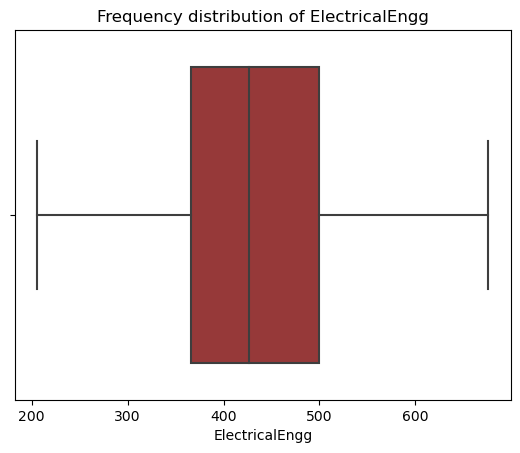

In [140]:
sns.boxplot(x='ElectricalEngg',data=df,color='brown')
plt.title('Frequency distribution of ElectricalEngg')

The boxplot refers to density of ElectricalEngg marks lying between the different ranges.

Text(0.5, 1.0, 'Frequency distribution of TelecomEngg')

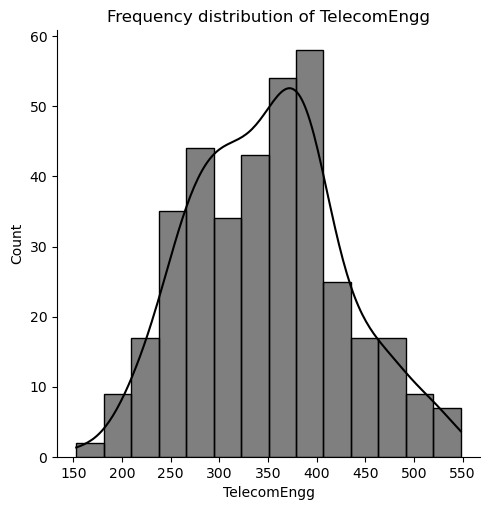

In [141]:
sns.displot(x='TelecomEngg',data=df,kde=True,color='black')
plt.title('Frequency distribution of TelecomEngg')

The above displot refers to the frequency distribution of the TelecomEngg.

<Axes: xlabel='TelecomEngg'>

Text(0.5, 1.0, 'Frequency distribution of TelecomEngg')

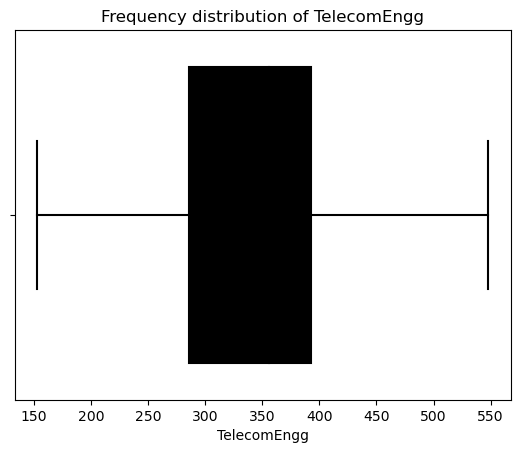

In [142]:
sns.boxplot(x='TelecomEngg',data=df,color='black')
plt.title('Frequency distribution of TelecomEngg')

The boxplot refers to density of TelecomEngg marks lying between the different ranges.

Text(0.5, 1.0, 'Frequency distribution of CivilEngg')

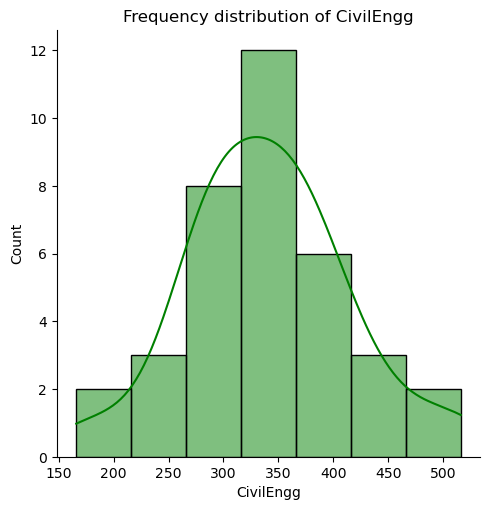

In [143]:
sns.displot(x='CivilEngg',data=df,kde=True,color='green')
plt.title('Frequency distribution of CivilEngg')

The above displot refers to the frequency distribution of the CivilEngg.

<Axes: xlabel='CivilEngg'>

Text(0.5, 1.0, 'Frequency distribution of CivilEngg')

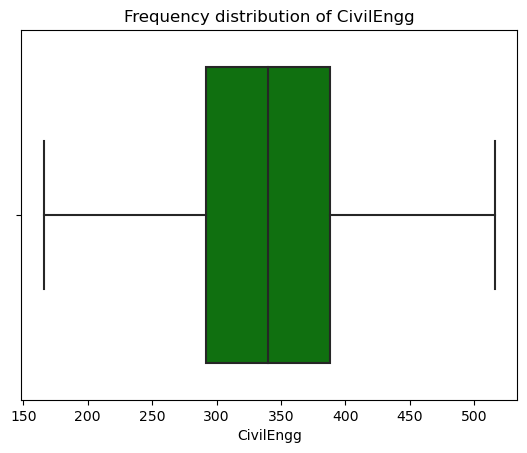

In [144]:
sns.boxplot(x='CivilEngg',data=df,color='green')
plt.title('Frequency distribution of CivilEngg')

The boxplot refers to density of CivilEngg marks lying between the different ranges.